# Traffic Collision Data Analysis

# Objective

In this case study, you will be working on California Traffic Collision Data Analysis using Apache Spark, a powerful distributed computing framework designed for big data processing. This assignment aims to provide hands-on experience in analyzing large-scale traffic collision datasets using PySpark and AWS services. You will apply data analytics techniques to clean, transform, and explore crash data, drawing meaningful insights to support traffic safety and urban planning. Beyond understanding how big data tools optimize performance on a single machine and across clusters, you will develop a structured approach to analyzing crash trends, identifying high-risk locations, and evaluating contributing factors to traffic incidents. Additionally, you will utilize AWS S3 to store the processed data efficiently after the ETL process, enabling scalable storage and easy retrieval for further analysis.


# Business Value:

Traffic collisions pose significant risks to public safety, requiring continuous monitoring and analysis to enhance road safety measures. Government agencies, city planners, and policymakers must leverage data-driven insights to improve infrastructure, optimize traffic management, and implement preventive measures.

In this assignment, you will analyze California traffic collision data to uncover patterns related to accident severity, location-based risks, and key contributing factors. With Apache Spark's ability to handle large datasets efficiently and AWS S3's scalable storage, transportation authorities can process vast amounts of crash data in real time, enabling faster and more informed decision-making.

As an analyst examining traffic safety trends, your task is to analyze historical crash data to derive actionable insights that can drive policy improvements and safety interventions. Your analysis will help identify high-risk areas, categorize accidents by severity and contributing factors, and store the processed data in an AWS S3 bucket for scalable and long-term storage.

By leveraging big data analytics and cloud-based storage, urban planners and traffic authorities can enhance road safety strategies, reduce accident rates, and improve public transportation planning.


# Dataset Overview

The dataset used in this analysis consists of California traffic collision data obtained from the Statewide Integrated Traffic Records System (SWITRS). It includes detailed records of traffic incidents across California, covering various attributes such as location, severity, involved parties, and contributing factors. The dataset has been preprocessed and transformed using PySpark to facilitate large-scale analysis. By leveraging Apache Spark, we ensure efficient data handling, enabling deeper insights into traffic patterns, accident trends, and potential safety improvements.

The dataset is a .sqlite file contains detailed information about traffic collisions across California and is structured into four primary tables:
- `collisions` table contains information about the collision, where it happened, what vehicles were involved.

- `parties` table contains information about the groups people involved in the collision including age, sex, and sobriety.

- `victims` table contains information about the injuries of specific people involved in the collision.

- `locations` table contains information about the geographical location and details of road intersections.

# Assignment Tasks

<ol>
    <li>
        <strong>Data Preparation</strong></br>
        The dataset consists of structured tables containing traffic collision data. Before conducting any analysis, it is essential to ensure that the data is properly formatted and structured for efficient processing.</br>
        Check for data consistency and ensure all columns are correctly formatted.</br>
        Apply sampling techniques if needed to extract a representative subset for analysis.</br>
        Structure and prepare the data for further processing and analysis.</br>
    </br>
    <li>
        <strong>Data Cleaning</strong></br>
            2.1 <strong>Fixing Columns:</strong> Ensure all columns are properly named and formatted.</br>
            2.2 <strong>Handling Missing Values:</strong> Decide on an approach to handle missing data (e.g., imputation or removal). Mention the approach in your report.</br>
            2.3 <strong>Handling Outliers:</strong> Identify outliers in the dataset and explain why they are considered outliers. It is not necessary to remove them for this task, but mention your approach for handling them.</br>
    </br>
    <li>
        <strong>Exploratory Data Analysis</strong></br>
        Finding Patterns and analyze the dataset and find patterns based on the following points:
                <ul>
                3.1 Classify variables into categorical and numerical types.</br>
                3.2 Analyze the distribution of collision severity.</br>
                3.3 Examine weather conditions during collisions.</br>
                3.4 Analyze the distribution of victim ages.</br>
                3.5 Study the relationship between collision severity and the number of victims.</br>
                3.6 Analyze the correlation between weather conditions and collision severity.</br>
                3.7 Visualize the impact of lighting conditions on collision severity.</br>
                3.8 Extract and analyze weekday-wise collision trends.</br>
                3.9 Assess the number of collisions occurring on different days of the week.</br>
                3.10 Study spatial distribution of collisions by county.</br>
                3.11 Generate a scatter plot to analyze collision locations geographically.</br>
                3.12 Extract and analyze collision trends over time, including yearly, monthly, and hourly trends.</br>
</ul>
</br>
<li>
<strong>ETL Querying</strong><br>
Write PySpark SQL queries for the following:</br>
<ol>
    4.1. Load the processed dataset as CSV files in S3 bucket.</br>
    4.2. Identify the top 5 counties with the highest number of collisions.</br>
    4.3. Identify the month with the highest number of collisions.</br>
    4.4. Determine the most common weather condition during collisions.</br>
    4.5. Calculate the percentage of collisions that resulted in fatalities.</br>
    4.6. Find the most dangerous time of day for collisions.</br>
    4.7. Identify the top 5 road surface conditions with the highest collision frequency.</br>
    4.8. Analyze lighting conditions that contribute to the highest number of collisions.</br>
</ol>
</br>
<li>
<strong>Conclusion</strong></br>
Provide final insights and recommendations based on the analysis:
    <ul>
        5.1 Recommendations to improve road safety by identifying high-risk locations and peak accident times for infrastructure improvements.</br>
        5.2 Suggestions to optimize traffic management by analyzing trends in collision severity, weather conditions, and lighting to improve road design and traffic signal timing.</br>
        5.3 Propose data-driven policy changes to enhance pedestrian and cyclist safety based on collision trends involving vulnerable road users.</br>
        5.4 Identify potential high-risk zones for proactive intervention by examining geographic collision density and historical accident data.</br>
        5.5 Assess the impact of environmental factors such as weather, road surface conditions, and lighting on accident frequency and severity.</br>
        5.6 Develop predictive models to anticipate collision hotspots and support proactive safety measures.</br>
        </ul>
        Conclude the analysis by summarizing key findings and business implications.</br>
        Explain the results of univariate, segmented univariate, and bivariate analyses in real-world traffic safety and policy terms.</br>
        Include visualizations and summarize the most important results in the report. Insights should explain why each variable is important and how they can influence traffic safety policies and urban planning.</br>
        </ul>
        </br>
    <li>
    <strong>Visualization Integration [Optional]</strong>
    <p>Enhance the project by incorporating a visualization component that connects the processed data stored in an S3 bucket to a business intelligence tool such as Tableau or Power BI. This involves setting up the connection between the S3 bucket and the chosen visualization tool, importing the processed dataset for analysis and visualization, creating interactive dashboards to explore key trends and insights and ensuring data updates are reflected dynamically in the visualization tool.<br>
</br>
</ol>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install Required Libraries

In [ ]:
## Install the required libraries
!pip install --quiet pyspark==3.5.4 pandas==2.2.2

In [ ]:
# Import the necessary libraries
import sqlite3
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, to_date

In [ ]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [ ]:
spark = SparkSession.builder.appName("ELT_assignment").getOrCreate()

#**1. Data Preparation** <font color = red>[5 marks]</font> <br>

The dataset consists of structured tables containing traffic collision data.

Before conducting any analysis, it is essential to ensure that the data is properly formatted and structured for efficient processing.

Check for data consistency and ensure all columns are correctly formatted.

In [ ]:
# Write code to load the data and check the schema
collision_df = spark.read.csv("/content/drive/MyDrive/Assignments/ETL/sample_collisions.csv",inferSchema=True,header=True)
parties_df = spark.read.csv("/content/drive/MyDrive/Assignments/ETL/sample_parties.csv",inferSchema=True,header=True)
victims_df = spark.read.csv("/content/drive/MyDrive/Assignments/ETL/sample_victims.csv",inferSchema=True,header=True)
case_id_df = spark.read.csv("/content/drive/MyDrive/Assignments/ETL/sample_case_ids.csv",inferSchema=True,header=True)

In [ ]:
collision_df.printSchema()
collision_df.limit(5).show()

root
 |-- case_id: double (nullable = true)
 |-- jurisdiction: double (nullable = true)
 |-- officer_id: string (nullable = true)
 |-- reporting_district: string (nullable = true)
 |-- chp_shift: string (nullable = true)
 |-- population: string (nullable = true)
 |-- county_city_location: integer (nullable = true)
 |-- county_location: string (nullable = true)
 |-- special_condition: double (nullable = true)
 |-- beat_type: string (nullable = true)
 |-- chp_beat_type: string (nullable = true)
 |-- chp_beat_class: string (nullable = true)
 |-- beat_number: string (nullable = true)
 |-- primary_road: string (nullable = true)
 |-- secondary_road: string (nullable = true)
 |-- distance: double (nullable = true)
 |-- direction: string (nullable = true)
 |-- intersection: double (nullable = true)
 |-- weather_1: string (nullable = true)
 |-- state_highway_indicator: double (nullable = true)
 |-- caltrans_county: string (nullable = true)
 |-- caltrans_district: double (nullable = true)
 |-- s

In [ ]:
parties_df.printSchema()
parties_df.limit(5).show()

root
 |-- id: integer (nullable = true)
 |-- case_id: double (nullable = true)
 |-- party_number: integer (nullable = true)
 |-- party_type: string (nullable = true)
 |-- at_fault: integer (nullable = true)
 |-- party_sex: string (nullable = true)
 |-- party_age: double (nullable = true)
 |-- party_sobriety: string (nullable = true)
 |-- direction_of_travel: string (nullable = true)
 |-- party_safety_equipment_1: string (nullable = true)
 |-- party_safety_equipment_2: string (nullable = true)
 |-- financial_responsibility: string (nullable = true)
 |-- cellphone_in_use: double (nullable = true)
 |-- cellphone_use_type: string (nullable = true)
 |-- other_associate_factor_1: string (nullable = true)
 |-- party_number_killed: integer (nullable = true)
 |-- party_number_injured: integer (nullable = true)
 |-- movement_preceding_collision: string (nullable = true)
 |-- vehicle_year: double (nullable = true)
 |-- vehicle_make: string (nullable = true)
 |-- statewide_vehicle_type: string (nu

In [ ]:
victims_df.printSchema()
victims_df.limit(5).show()

root
 |-- id: integer (nullable = true)
 |-- case_id: double (nullable = true)
 |-- party_number: integer (nullable = true)
 |-- victim_role: string (nullable = true)
 |-- victim_sex: string (nullable = true)
 |-- victim_age: double (nullable = true)
 |-- victim_degree_of_injury: string (nullable = true)
 |-- victim_seating_position: string (nullable = true)
 |-- victim_safety_equipment_1: string (nullable = true)
 |-- victim_safety_equipment_2: string (nullable = true)
 |-- victim_ejected: string (nullable = true)

+-------+-----------+------------+-----------+----------+----------+-----------------------+-----------------------+-------------------------+-------------------------+--------------+
|     id|    case_id|party_number|victim_role|victim_sex|victim_age|victim_degree_of_injury|victim_seating_position|victim_safety_equipment_1|victim_safety_equipment_2|victim_ejected|
+-------+-----------+------------+-----------+----------+----------+-----------------------+------------------

In [ ]:
case_id_df.printSchema()
case_id_df.limit(5).show()

root
 |-- case_id: double (nullable = true)
 |-- db_year: integer (nullable = true)

+-----------+-------+
|    case_id|db_year|
+-----------+-------+
|9.0017156E7|   2021|
|  4078685.0|   2021|
|9.0588783E7|   2021|
|  3351919.0|   2018|
|   632208.0|   2018|
+-----------+-------+



#**2. Data Cleaning** <font color = red>[20 marks]</font> <br>


In [ ]:
#Display Schema & Sample Data
partiesSchema = StructType([StructField('id', IntegerType(),True),
                        StructField('case_id', StringType(),True),
                        StructField('party_number', IntegerType(),True),
                        StructField('party_type', StringType(),True),
                        StructField('at_fault', IntegerType(),True),
                        StructField('party_sex', StringType(),True),
                        StructField('party_age', StringType(),True),
                        StructField('party_sobriety', StringType(),True),
                        StructField('direction_of_travel', StringType(),True),
                        StructField('party_safety_equipment_1', StringType(),True),
                        StructField('party_safety_equipment_2', StringType(),True),
                        StructField('financial_responsibility', StringType(),True),
                        StructField('cellphone_in_use', StringType(),True),
                        StructField('cellphone_use_type', StringType(),True),
                        StructField('other_associate_factor_1', StringType(),True),
                        StructField('party_number_killed', IntegerType(),True),
                        StructField('party_number_injured', IntegerType(),True),
                        StructField('movement_preceding_collision', StringType(),True),
                        StructField('vehicle_year', StringType(),True),
                        StructField('vehicle_make', StringType(),True),
                        StructField('statewide_vehicle_type', StringType(),True),
                        StructField('chp_vehicle_type_towing', StringType(),True),
                        StructField('chp_vehicle_type_towed', StringType(),True),
                        StructField('party_race', StringType(),True),
                        ])

In [ ]:
parties_df1 = spark.read.csv("/content/drive/MyDrive/Assignments/ETL/sample_parties.csv",header=True,schema=partiesSchema)
parties_df1.select(max(length(col('case_id')))).show()

+--------------------+
|max(length(case_id))|
+--------------------+
|                  22|
+--------------------+



In [ ]:
parties_df = spark.read.csv("/content/drive/MyDrive/Assignments/ETL/sample_parties.csv",header=True,schema=partiesSchema)

parties_df = parties_df.withColumn("case_id", col("case_id").cast(DecimalType(22,0)))

In [ ]:
parties_df.printSchema()
parties_df.limit(5).show()

root
 |-- id: integer (nullable = true)
 |-- case_id: decimal(22,0) (nullable = true)
 |-- party_number: integer (nullable = true)
 |-- party_type: string (nullable = true)
 |-- at_fault: integer (nullable = true)
 |-- party_sex: string (nullable = true)
 |-- party_age: string (nullable = true)
 |-- party_sobriety: string (nullable = true)
 |-- direction_of_travel: string (nullable = true)
 |-- party_safety_equipment_1: string (nullable = true)
 |-- party_safety_equipment_2: string (nullable = true)
 |-- financial_responsibility: string (nullable = true)
 |-- cellphone_in_use: string (nullable = true)
 |-- cellphone_use_type: string (nullable = true)
 |-- other_associate_factor_1: string (nullable = true)
 |-- party_number_killed: integer (nullable = true)
 |-- party_number_injured: integer (nullable = true)
 |-- movement_preceding_collision: string (nullable = true)
 |-- vehicle_year: string (nullable = true)
 |-- vehicle_make: string (nullable = true)
 |-- statewide_vehicle_type: str

In [ ]:
victimSchema = StructType([StructField('id', IntegerType(),True),
                        StructField('case_id', StringType(),True),
                        StructField('party_number', IntegerType(),True),
                        StructField('victim_role', StringType(),True),
                        StructField('victim_sex', StringType(),True),
                        StructField('victim_age', StringType(),True),
                        StructField('victim_degree_of_injury', StringType(),True),
                        StructField('victim_seating_position', StringType(),True),
                        StructField('victim_safety_equipment_1', StringType(),True),
                        StructField('victim_safety_equipment_2', StringType(),True),
                        StructField('victim_ejected', StringType(),True),
                        ])

In [ ]:
victims_df1 = spark.read.csv("/content/drive/MyDrive/Assignments/ETL/sample_victims.csv",header=True,schema=victimSchema)
victims_df1.select(max(length(col('case_id')))).show()

+--------------------+
|max(length(case_id))|
+--------------------+
|                  22|
+--------------------+



In [ ]:
victims_df = spark.read.csv("/content/drive/MyDrive/Assignments/ETL/sample_victims.csv",header=True,schema=victimSchema)

victims_df = victims_df.withColumn("case_id", col("case_id").cast(DecimalType(22,0)))

In [ ]:
victims_df.printSchema()
victims_df.show(5)

root
 |-- id: integer (nullable = true)
 |-- case_id: decimal(22,0) (nullable = true)
 |-- party_number: integer (nullable = true)
 |-- victim_role: string (nullable = true)
 |-- victim_sex: string (nullable = true)
 |-- victim_age: string (nullable = true)
 |-- victim_degree_of_injury: string (nullable = true)
 |-- victim_seating_position: string (nullable = true)
 |-- victim_safety_equipment_1: string (nullable = true)
 |-- victim_safety_equipment_2: string (nullable = true)
 |-- victim_ejected: string (nullable = true)

+-------+--------+------------+-----------+----------+----------+-----------------------+-----------------------+-------------------------+-------------------------+--------------+
|     id| case_id|party_number|victim_role|victim_sex|victim_age|victim_degree_of_injury|victim_seating_position|victim_safety_equipment_1|victim_safety_equipment_2|victim_ejected|
+-------+--------+------------+-----------+----------+----------+-----------------------+--------------------

In [ ]:
caseid_Schema = StructType([
    StructField('case_id', StringType(), True),
    StructField('db_year', IntegerType(), True),
    ])

In [ ]:
case_id_df1 = spark.read.csv("/content/drive/MyDrive/Assignments/ETL/sample_case_ids.csv",header=True,schema=caseid_Schema)
case_id_df1.select(max(length(col("case_id")))).show()

+--------------------+
|max(length(case_id))|
+--------------------+
|                  22|
+--------------------+



In [ ]:
case_id_df = spark.read.csv("/content/drive/MyDrive/Assignments/ETL/sample_case_ids.csv",header=True,schema=caseid_Schema)

case_id_df = case_id_df.withColumn("case_id", col("case_id").cast(DecimalType(22,0)))

In [ ]:
case_id_df.printSchema()
case_id_df.limit(5).show()

root
 |-- case_id: decimal(22,0) (nullable = true)
 |-- db_year: integer (nullable = true)

+--------+-------+
| case_id|db_year|
+--------+-------+
|90017156|   2021|
| 4078685|   2021|
|90588783|   2021|
| 3351919|   2018|
|  632208|   2018|
+--------+-------+



In [ ]:
collisionsSchema = StructType([
    StructField('case_id', StringType(), True),
    StructField('jurisdiction', StringType(), True),
    StructField('officer_id', StringType(), True),
    StructField('reporting_district', StringType(), True),
    StructField('chp_shift', StringType(), True),
    StructField('population', StringType(), True),
    StructField('county_city_location', IntegerType(), True),
    StructField('county_location', StringType(), True),
    StructField('special_condition', StringType(), True),
    StructField('beat_type', StringType(), True),
    StructField('chp_beat_type', StringType(), True),
    StructField('chp_beat_class', StringType(), True),
    StructField('beat_number', StringType(), True),
    StructField('primary_road', StringType(), True),
    StructField('secondary_road', StringType(), True),
    StructField('distance', StringType(), True),
    StructField('direction', StringType(), True),
    StructField('intersection', StringType(), True),
    StructField('weather_1', StringType(), True),
    StructField('state_highway_indicator', StringType(), True),
    StructField('caltrans_county', StringType(), True),
    StructField('caltrans_district', StringType(), True),
    StructField('state_route', StringType(), True),
    StructField('postmile', StringType(), True),
    StructField('location_type', StringType(), True),
    StructField('side_of_highway', StringType(), True),
    StructField('tow_away', StringType(), True),
    StructField('collision_severity', StringType(), True),
    StructField('killed_victims', StringType(), True),
    StructField('injured_victims', StringType(), True),
    StructField('party_count', StringType(), True),
    StructField('primary_collision_factor', StringType(), True),
    StructField('pcf_violation_category', StringType(), True),
    StructField('pcf_violation', StringType(), True),
    StructField('pcf_violation_subsection', StringType(), True),
    StructField('hit_and_run', StringType(), True),
    StructField('type_of_collision', StringType(), True),
    StructField('motor_vehicle_involved_with', StringType(), True),
    StructField('pedestrian_action', StringType(), True),
    StructField('road_surface', StringType(), True),
    StructField('road_condition_1', StringType(), True),
    StructField('lighting', StringType(), True),
    StructField('control_device', StringType(), True),
    StructField('chp_road_type', StringType(), True),
    StructField('pedestrian_collision', StringType(), True),
    StructField('bicycle_collision', StringType(), True),
    StructField('motorcycle_collision', StringType(), True),
    StructField('truck_collision', StringType(), True),
    StructField('not_private_property', StringType(), True),
    StructField('statewide_vehicle_type_at_fault', StringType(), True),
    StructField('chp_vehicle_type_at_fault', StringType(), True),
    StructField('severe_injury_count', StringType(), True),
    StructField('other_visible_injury_count', StringType(), True),
    StructField('complaint_of_pain_injury_count', StringType(), True),
    StructField('pedestrian_killed_count', StringType(), True),
    StructField('pedestrian_injured_count', StringType(), True),
    StructField('bicyclist_killed_count', StringType(), True),
    StructField('bicyclist_injured_count', StringType(), True),
    StructField('motorcyclist_killed_count', StringType(), True),
    StructField('motorcyclist_injured_count', StringType(), True),
    StructField('latitude', DoubleType(), True),
    StructField('longitude', DoubleType(), True),
    StructField('collision_date', DateType(), True),
    StructField('collision_time', TimestampType(), True),
    StructField('process_date', DateType(), True),
])

In [ ]:
collision_df1 = spark.read.csv("/content/drive/MyDrive/Assignments/ETL/sample_collisions.csv",header=True,schema=collisionsSchema)
collision_df1.select(max(length(col("case_id")))).show()

+--------------------+
|max(length(case_id))|
+--------------------+
|                  22|
+--------------------+



In [ ]:
collision_df = spark.read.csv("/content/drive/MyDrive/Assignments/ETL/sample_collisions.csv",header=True,schema=collisionsSchema)

collision_df = collision_df.withColumn("case_id", col("case_id").cast(DecimalType(22,0)))

In [ ]:
collision_df.printSchema()
collision_df.limit(5).show()

root
 |-- case_id: decimal(22,0) (nullable = true)
 |-- jurisdiction: string (nullable = true)
 |-- officer_id: string (nullable = true)
 |-- reporting_district: string (nullable = true)
 |-- chp_shift: string (nullable = true)
 |-- population: string (nullable = true)
 |-- county_city_location: integer (nullable = true)
 |-- county_location: string (nullable = true)
 |-- special_condition: string (nullable = true)
 |-- beat_type: string (nullable = true)
 |-- chp_beat_type: string (nullable = true)
 |-- chp_beat_class: string (nullable = true)
 |-- beat_number: string (nullable = true)
 |-- primary_road: string (nullable = true)
 |-- secondary_road: string (nullable = true)
 |-- distance: string (nullable = true)
 |-- direction: string (nullable = true)
 |-- intersection: string (nullable = true)
 |-- weather_1: string (nullable = true)
 |-- state_highway_indicator: string (nullable = true)
 |-- caltrans_county: string (nullable = true)
 |-- caltrans_district: string (nullable = true)

##**2.1 Missing Values** <font color = red>[10 marks]</font> <br>


In [ ]:
# Check for Missing Values
def missing_vals_percentage(df, table):
    print(f"\nMissing values percentage in table {table}:")
    df.select([round(mean(col(c).isNull().cast("int"))*100,2).alias(c)for c in df.columns]).show()

# find missing values in each table
missing_vals_percentage(case_id_df, "case_ids")
missing_vals_percentage(collision_df, "collisions")
missing_vals_percentage(parties_df, "parties")
missing_vals_percentage(victims_df, "victims")


Missing values percentage in table case_ids:
+-------+-------+
|case_id|db_year|
+-------+-------+
|    0.0|    0.0|
+-------+-------+


Missing values percentage in table collisions:
+-------+------------+----------+------------------+---------+----------+--------------------+---------------+-----------------+---------+-------------+--------------+-----------+------------+--------------+--------+---------+------------+---------+-----------------------+---------------+-----------------+-----------+--------+-------------+---------------+--------+------------------+--------------+---------------+-----------+------------------------+----------------------+-------------+------------------------+-----------+-----------------+---------------------------+-----------------+------------+----------------+--------+--------------+-------------+--------------------+-----------------+--------------------+---------------+--------------------+-------------------------------+-------------------------+

In [ ]:
#Drop Sparse Columns
def drop_sparse_cols(df, table, threshold=0.5, excluded_cols=None):
    if excluded_cols is None:
        excluded_cols = []

    table_count = df.count()
    column_count = len(df.columns)
    print(f"\nCount of columns in {table}: {column_count}")

    # Directly calculate missing values count without creating temporary columns
    missing_counts = []
    for c in df.columns:
        if isinstance(df.schema[c].dataType, StringType):
            # For string columns, check for nulls or empty strings
            missing_counts.append(sum(when(col(c).isNull() | (col(c) == ''), 1).otherwise(0)).alias(c))
        else:
            # For non-string columns, just check for nulls
            missing_counts.append(sum(when(col(c).isNull(), 1).otherwise(0)).alias(c))

    miss_cnt = df.agg(*missing_counts).collect()[0].asDict()

    # Handle None (treat as 0)
    sparse_cols = [
        c_name for c_name, miss in miss_cnt.items()
        if (miss or 0) / table_count > threshold
    ]

    # Filter out columns that should be excluded from dropping
    sparse_cols_to_drop = [col_name for col_name in sparse_cols if col_name not in excluded_cols]

    print(f"Sparse Cols to drop in table {table} (>{threshold*100}% miss, excluding {excluded_cols}): {sparse_cols_to_drop}")

    # Drop sparse columns
    return df.drop(*sparse_cols_to_drop)

# Apply to each DataFrame with a 50% threshold
case_id_df = drop_sparse_cols(case_id_df, "case_ids")
collision_df = drop_sparse_cols(collision_df, "collisions", excluded_cols=['latitude', 'longitude', 'location_type'])
parties_df = drop_sparse_cols(parties_df, "parties")
victims_df = drop_sparse_cols(victims_df, "victims")


Count of columns in case_ids: 2
Sparse Cols to drop in table case_ids (>50.0% miss, excluding []): []

Count of columns in collisions: 65
Sparse Cols to drop in table collisions (>50.0% miss, excluding ['latitude', 'longitude', 'location_type']): ['reporting_district', 'caltrans_county', 'caltrans_district', 'state_route', 'postmile', 'side_of_highway', 'pcf_violation_subsection']

Count of columns in parties: 24
Sparse Cols to drop in table parties (>50.0% miss, excluding []): []

Count of columns in victims: 11
Sparse Cols to drop in table victims (>50.0% miss, excluding []): []


In [ ]:
# I have identified all the required columns based on our further analysis.
imp_columns = ['case_id','jurisdiction','county_city_location','county_location','weather_1','collision_severity','killed_victims','injured_victims','party_count',
               'type_of_collision','road_surface','road_condition_1','lighting','latitude','longitude','collision_date','collision_time','process_date']
collision_df = collision_df.select(*imp_columns)

In [ ]:
#Convert Data Type
collision_df = collision_df.withColumn("collision_date", to_date(col("collision_date"), "yyyy-MM-dd"))
collision_df = collision_df.withColumn("process_date", to_date(col("process_date"), "yyyy-MM-dd"))
collision_df = collision_df.withColumn("jurisdiction", col("jurisdiction").cast(DoubleType()).cast(IntegerType()))
collision_df = collision_df.withColumn("killed_victims", col("killed_victims").cast(DoubleType()).cast(IntegerType()))
collision_df = collision_df.withColumn("injured_victims", col("injured_victims").cast(DoubleType()).cast(IntegerType()))

victims_df = victims_df.withColumn("victim_age", col("victim_age").cast(DoubleType()).cast(IntegerType()))

parties_df = parties_df.withColumn("party_age", col("party_age").cast(DoubleType()).cast(IntegerType()))
parties_df = parties_df.withColumn("cellphone_in_use", col("cellphone_in_use").cast(DoubleType()).cast(IntegerType()))
parties_df = parties_df.withColumn("vehicle_year", col("vehicle_year").cast(DoubleType()).cast(IntegerType()))

In [ ]:
#Handle Missing Values
def impute_missing_vals(df, table):
    print(f"\nHandling missing values for Table {table}:")

    # Replace missing (int and double) values to 0
    num_cols = [c_name for c_name, dtype in df.dtypes if dtype in ['int', 'double', 'decimal(22,0)']]
    for c_name in num_cols:
        df = df.fillna({c_name: 0})
    print(f"Replaced missing numbers with 0.")

    # Replace NULL string values with 'Unknown'
    obj_cols = [c_name for c_name, dtype in df.dtypes if dtype == 'string']
    for c_name in obj_cols:
        df = df.fillna({c_name: 'Unknown'})
    print(f"Replaced NULL columns with 'Unknown'.")

    # Fill datetime columns with the earliest available date
    date_cols = [c_name for c_name, dtype in df.dtypes if dtype == 'timestamp']
    for c_name in date_cols:
        earliest_date = df.select(min(col(c_name))).collect()[0][0]  # Get the earliest date
        if earliest_date:
            df = df.withColumn(c_name, when(col(c_name).isNull(), earliest_date).otherwise(col(c_name)))
            print(f"Replaced missing values in '{c_name}' with earliest date: {earliest_date}")

    return df

# Apply to all datasets
case_id_df = impute_missing_vals(case_id_df, "caseids__df")
collision_df = impute_missing_vals(collision_df, "collisions_df")
parties_df = impute_missing_vals(parties_df, "parties_df")
victims_df = impute_missing_vals(victims_df, "victims_df")


Handling missing values for Table caseids__df:
Replaced missing numbers with 0.
Replaced NULL columns with 'Unknown'.

Handling missing values for Table collisions_df:
Replaced missing numbers with 0.
Replaced NULL columns with 'Unknown'.
Replaced missing values in 'collision_time' with earliest date: 2026-01-14 00:00:00

Handling missing values for Table parties_df:
Replaced missing numbers with 0.
Replaced NULL columns with 'Unknown'.

Handling missing values for Table victims_df:
Replaced missing numbers with 0.
Replaced NULL columns with 'Unknown'.


##**2.2 Fixing Columns** <font color = red>[5 marks]</font> <br>


In [ ]:
#Remove Duplicates
def remove_duplicates(df, table):

    df_cleaned = df.dropDuplicates()
    print(f"Removed {df.count() - df_cleaned.count()} duplicate records from {table}.")
    return df_cleaned

# Apply to all datasets
case_id_df = remove_duplicates(case_id_df, "caseids_df")
collision_df = remove_duplicates(collision_df, "collisions_df")
parties_df = remove_duplicates(parties_df, "parties_df")
victims_df = remove_duplicates(victims_df, "victims_df")

Removed 35 duplicate records from caseids_df.
Removed 1 duplicate records from collisions_df.
Removed 0 duplicate records from parties_df.
Removed 0 duplicate records from victims_df.


In [ ]:
#Detect Outliers using IQR
def detect_outliers_iqr(df, table, cols):
    print(f"\nDetecting outliers using IQR in {table} :")

    for c in cols:

        qntiles = df.approxQuantile(c, [0.25, 0.75], 0.05)  # Relative error tolerance is 0.05
        Q1 = qntiles[0]      # Calculate Q1 (25th percentile)
        Q3 = qntiles[1]      # Calculate Q3 (75th percentile)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers: values below the lower bound or above the upper bound
        outliers_df = df.filter((col(c) < lower_bound) | (col(c) > upper_bound))

        # Count outliers only if there are any
        outliers_count = outliers_df.count()
        if outliers_count > 0:
            print(f"{c}: {outliers_count} outliers")

# List of numerical columns to check for outliers
def num_cols(df, table):
    # Filter numeric columns by checking data type of each column
    num_cols_list = [c_name for c_name, dtype in df.dtypes if dtype in ['int', 'double', 'long', 'decimal(22,0)'] and 'id' not in c_name.lower()]
    print(f"\n{table} - Numeric columns:")
    for c in num_cols_list:

        print(f" - {c}")
    return num_cols_list

In [ ]:
# List of numerical columns to check for outliers
case_ids_num_cols = num_cols(case_id_df, "case_df")
collisions_num_cols = num_cols(collision_df, "collisions_df")
parties_num_cols = num_cols(parties_df, "parties_df")
victims_num_cols = num_cols(victims_df, "victims_df")


case_df - Numeric columns:
 - db_year

collisions_df - Numeric columns:
 - jurisdiction
 - county_city_location
 - killed_victims
 - injured_victims
 - latitude
 - longitude

parties_df - Numeric columns:
 - party_number
 - at_fault
 - party_age
 - cellphone_in_use
 - party_number_killed
 - party_number_injured
 - vehicle_year

victims_df - Numeric columns:
 - party_number
 - victim_age


In [ ]:
# Apply outlier detection to each DataFrame
detect_outliers_iqr(case_id_df, "case_df", case_ids_num_cols)
detect_outliers_iqr(collision_df, "collisions_df", collisions_num_cols)
detect_outliers_iqr(parties_df, "parties_df", parties_num_cols)
detect_outliers_iqr(victims_df, "victims_df", victims_num_cols)


Detecting outliers using IQR in case_df :

Detecting outliers using IQR in collisions_df :
injured_victims: 33313 outliers
longitude: 266742 outliers

Detecting outliers using IQR in parties_df :
party_number: 35411 outliers
party_age: 11263 outliers
cellphone_in_use: 26406 outliers
party_number_killed: 6889 outliers
party_number_injured: 15414 outliers
vehicle_year: 190071 outliers

Detecting outliers using IQR in victims_df :
party_number: 12976 outliers
victim_age: 17284 outliers


##**2.3 Outlier Analysis** <font color = red>[5 marks]</font> <br>


In [ ]:
#Remove Outliers
def remove_outliers_iqr(df, table, num_cols, ex_cols=None):
    print(f"\nRemoving outliers from {table}...")
    clean_df = df
    total_removed = 0

    # Ensure ex_cols is a list for easy lookup
    if ex_cols is None:
        ex_cols = []

    for c in num_cols:
        if c in ex_cols:
            print(f" - Skipping outlier removal for excluded column: '{c}'")
            continue

        # Calculate Q1 and Q3
        q1, q3 = clean_df.approxQuantile(c, [0.25, 0.75], 0.05)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        before_count = clean_df.count()
        clean_df = clean_df.filter((col(c) >= lower) & (col(c) <= upper))
        after_count = clean_df.count()

        removed = before_count - after_count
        total_removed += removed

        if removed > 0:
            print(f" - {removed} rows removed based on column '{c}'")

    if total_removed == 0:
        print(" - No outliers removed.")

    return clean_df

# Define columns to exclude from outlier removal
ex_case_id = ['case_id']
ex_collison = ['case_id', 'id',"injured_victims","longitude","latitude"]
ex_party = ['case_id', 'id', 'party_number']
ex_victim = ['case_id', 'id', 'party_number']

# Apply the outlier removal to all datasets
case_id_df = remove_outliers_iqr(case_id_df, "case_df", case_ids_num_cols, ex_case_id)
collision_df = remove_outliers_iqr(collision_df, "collisions_df",collisions_num_cols,  ex_collison)
parties_df = remove_outliers_iqr(parties_df, "parties_df", parties_num_cols , ex_party)
victims_df = remove_outliers_iqr(victims_df, "victims_df", victims_num_cols,  ex_victim)


Removing outliers from case_df...
 - No outliers removed.

Removing outliers from collisions_df...
 - Skipping outlier removal for excluded column: 'injured_victims'
 - Skipping outlier removal for excluded column: 'latitude'
 - Skipping outlier removal for excluded column: 'longitude'
 - No outliers removed.

Removing outliers from parties_df...
 - Skipping outlier removal for excluded column: 'party_number'
 - 11263 rows removed based on column 'party_age'
 - 26325 rows removed based on column 'cellphone_in_use'
 - 6636 rows removed based on column 'party_number_killed'
 - 14930 rows removed based on column 'party_number_injured'
 - 183972 rows removed based on column 'vehicle_year'

Removing outliers from victims_df...
 - Skipping outlier removal for excluded column: 'party_number'
 - 17284 rows removed based on column 'victim_age'


#**3. Exploratory Data Analysis** <font color = red>[65 marks]</font> <br>


##**3.1.1. Data Preparation** <font color = red>[5 marks]</font> <br>

Q: Classify variables into categorical and numerical.

In [ ]:
def classify_cat_num_columns(df,table):
    print(f"\n{table}:")
    cat_cols = [c for c, t in df.dtypes if t == 'string']
    num_cols = [c for c, t in df.dtypes if t in ['int', 'double', 'long', 'decimal(22,0)']]
    print("Categorical Columns:", cat_cols)
    print("Numerical Columns:", num_cols)
    return cat_cols, num_cols

case_id_cat_cols, case_id_num_cols = classify_cat_num_columns(case_id_df,"case_id_df")
collision_cat_cols, collision_num_cols = classify_cat_num_columns(collision_df,"collision_df")
parties_cat_cols, parties_num_cols = classify_cat_num_columns(parties_df,"parties_df")
victims_cat_cols, victims_num_cols = classify_cat_num_columns(victims_df,"victims_df")


case_id_df:
Categorical Columns: []
Numerical Columns: ['case_id', 'db_year']

collision_df:
Categorical Columns: ['county_location', 'weather_1', 'collision_severity', 'party_count', 'type_of_collision', 'road_surface', 'road_condition_1', 'lighting']
Numerical Columns: ['case_id', 'jurisdiction', 'county_city_location', 'killed_victims', 'injured_victims', 'latitude', 'longitude']

parties_df:
Categorical Columns: ['party_type', 'party_sex', 'party_sobriety', 'direction_of_travel', 'party_safety_equipment_1', 'party_safety_equipment_2', 'financial_responsibility', 'cellphone_use_type', 'other_associate_factor_1', 'movement_preceding_collision', 'vehicle_make', 'statewide_vehicle_type', 'chp_vehicle_type_towing', 'chp_vehicle_type_towed', 'party_race']
Numerical Columns: ['id', 'case_id', 'party_number', 'at_fault', 'party_age', 'cellphone_in_use', 'party_number_killed', 'party_number_injured', 'vehicle_year']

victims_df:
Categorical Columns: ['victim_role', 'victim_sex', 'victim_de

In [ ]:
# Reordering & Renaming Columns
imp_cols = ['case_id', 'collision_date', 'process_date', 'collision_severity', 'injured_victims', 'killed_victims']
imp_cols = [c for c in imp_cols if c in collision_df.columns]  # Keep only existing columns

# Get remaining columns
other = [c for c in collision_df.columns if c not in imp_cols]

# Reorder
collision_df = collision_df.select(imp_cols + other)

collision_df = collision_df.withColumnRenamed("weather_1","weather")
collision_df = collision_df.withColumnRenamed("road_condition_1","road_condition")

In [ ]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

# String Indexing for Categorical Columns
def encode_cat_cols(df):
    cat_cols = [c for c, t in df.dtypes if t == 'string']
    indexers = []
    for c in cat_cols:
        indexer = StringIndexer(inputCol=c, outputCol=c + "_indexed")
        indexers.append(indexer)

     # Create a pipeline to apply all StringIndexers
    pipeline = Pipeline(stages=indexers)

    # Fit and transform the data
    df_fit_transform = pipeline.fit(df).transform(df)

    print(f"Encoded {len(cat_cols)} categorical columns.")
    return df_fit_transform

In [ ]:
# Apply encoding to collisions_df
collision_df = encode_cat_cols(collision_df)

# Show the transformed dataframe
collision_df.limit(5).show()

Encoded 8 categorical columns.
+--------+--------------+------------+--------------------+---------------+--------------+------------+--------------------+---------------+-------+-----------+-----------------+------------+--------------+--------------------+--------+----------+-------------------+--------------------------+-----------------------+---------------+-------------------+-------------------------+--------------------+----------------------+----------------+
| case_id|collision_date|process_date|  collision_severity|injured_victims|killed_victims|jurisdiction|county_city_location|county_location|weather|party_count|type_of_collision|road_surface|road_condition|            lighting|latitude| longitude|     collision_time|collision_severity_indexed|county_location_indexed|weather_indexed|party_count_indexed|type_of_collision_indexed|road_surface_indexed|road_condition_indexed|lighting_indexed|
+--------+--------------+------------+--------------------+---------------+----------

In [ ]:
# Final cleaned data
def final_df_shape(df, name):
    num_rows = df.count()
    num_cols = len(df.columns)
    print(f"{name} ==> Rows: {num_rows}, Columns: {num_cols}")

# Print final shapes for each cleaned DataFrame
final_df_shape(case_id_df , "case_df")
final_df_shape(collision_df, "collisions_df")
final_df_shape(parties_df, "parties_df")
final_df_shape(victims_df, "victims_df")

case_df ==> Rows: 942398, Columns: 2
collisions_df ==> Rows: 935790, Columns: 26
parties_df ==> Rows: 1623791, Columns: 24
victims_df ==> Rows: 946649, Columns: 11


In [ ]:
# LOAD
# case_id_df.coalesce(1).write.mode("overwrite").option("header", "true").csv("case_id.csv")
# collision_df.coalesce(1).write.mode("overwrite").option("header", "true").csv("collision.csv")
# parties_df.coalesce(1).write.mode("overwrite").option("header", "true").csv("parties.csv")
# victims_df.coalesce(1).write.mode("overwrite").option("header", "true").csv("victims.csv")

In [ ]:
collisions_cleaned = spark.read.csv("/content/drive/MyDrive/Assignments/ETL/cleaned_data/collisions_cleaned_encode.csv",inferSchema=True,header=True)
parties_cleaned = spark.read.csv("/content/drive/MyDrive/Assignments/ETL/cleaned_data/parties_cleaned.csv",inferSchema=True,header=True)
victims_cleaned = spark.read.csv("/content/drive/MyDrive/Assignments/ETL/cleaned_data/victims_cleaned.csv",inferSchema=True,header=True)
case_ids_cleaned = spark.read.csv("/content/drive/MyDrive/Assignments/ETL/cleaned_data/case_ids_cleaned.csv",inferSchema=True,header=True)

In [ ]:
collisions_cleaned.printSchema()
collisions_cleaned.limit(5).show()
parties_cleaned.printSchema()
parties_cleaned.limit(5).show()
victims_cleaned.printSchema()
victims_cleaned.limit(5).show()
case_ids_cleaned.printSchema()
case_ids_cleaned.limit(5).show()

root
 |-- case_id: decimal(20,0) (nullable = true)
 |-- collision_date: date (nullable = true)
 |-- process_date: date (nullable = true)
 |-- collision_severity: string (nullable = true)
 |-- injured_victims: integer (nullable = true)
 |-- killed_victims: integer (nullable = true)
 |-- jurisdiction: integer (nullable = true)
 |-- county_city_location: integer (nullable = true)
 |-- county_location: string (nullable = true)
 |-- weather: string (nullable = true)
 |-- party_count: double (nullable = true)
 |-- type_of_collision: string (nullable = true)
 |-- road_surface: string (nullable = true)
 |-- road_condition: string (nullable = true)
 |-- lighting: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- collision_time: timestamp (nullable = true)
 |-- collision_severity_indexed: double (nullable = true)
 |-- county_location_indexed: double (nullable = true)
 |-- weather_indexed: double (nullable = true)
 |-- party_count_index

Loading the Final Cleaned Dataset into S3 Bucket

##**3.1.2. Analyze the distribution of collision severity.** <font color = red>[5 marks]</font> <br>

Q: Analyze the distribution of collision severity.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

+--------------------------+--------------------+------+
|collision_severity_indexed|  collision_severity| count|
+--------------------------+--------------------+------+
|                       0.0|property damage only|570479|
|                       1.0|                pain|226492|
|                       2.0|        other injury|116681|
|                       3.0|       severe injury| 22138|
+--------------------------+--------------------+------+



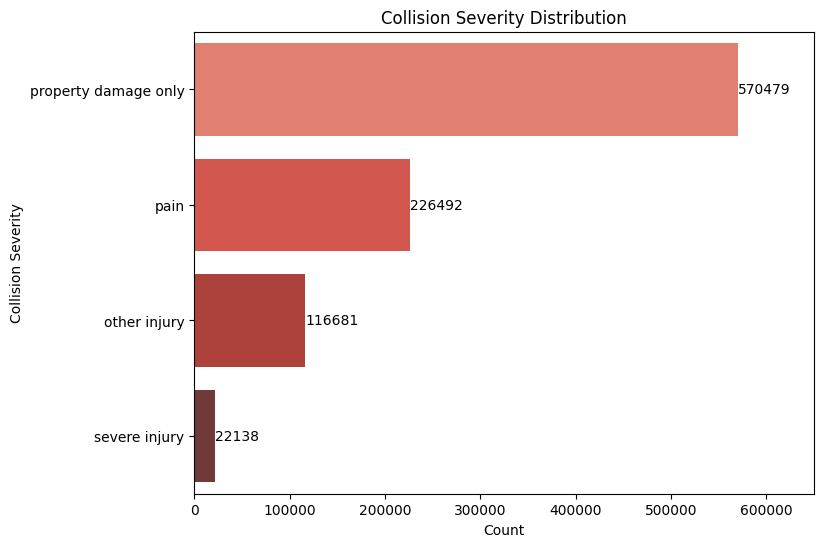

In [ ]:
# Univariate Analysis
severity_dist = collisions_cleaned.groupBy("collision_severity_indexed","collision_severity").count().orderBy(desc("count"))
severity_dist.show()

# Convert to Pandas
severity_dist_pd = severity_dist.toPandas()

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=severity_dist_pd,x='count',y='collision_severity',hue="collision_severity",palette="Reds_d")
plt.title("Collision Severity Distribution")
plt.xlabel("Count")
plt.ylabel("Collision Severity")
plt.xlim(0, 650000)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

##**3.1.3. Weather conditions during collisions.** <font color = red>[5 marks]</font> <br>

Q: Examine weather conditions during collisions.

+---------------+-------+------+
|weather_indexed|weather| count|
+---------------+-------+------+
|            0.0|  clear|769926|
|            1.0| cloudy|122155|
|            2.0|raining| 32341|
|            3.0|Unknown|  4626|
|            4.0|    fog|  3901|
|            5.0|snowing|  1370|
|            6.0|  other|  1081|
|            7.0|   wind|   390|
+---------------+-------+------+



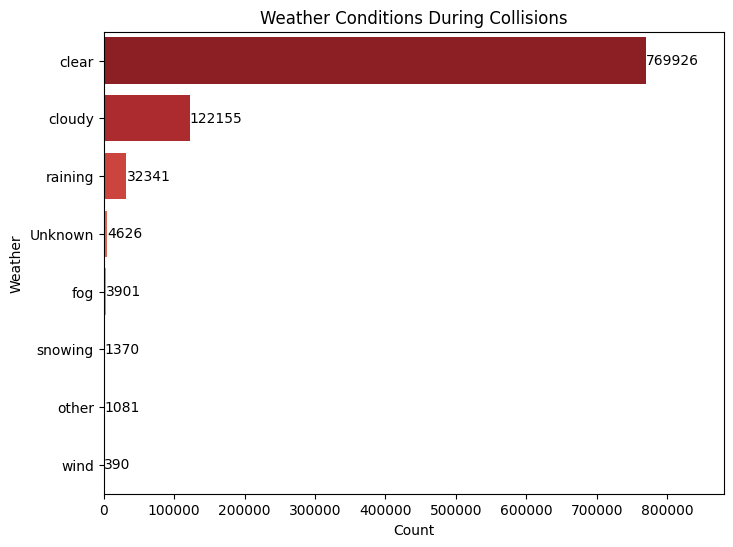

In [ ]:
# Weather Conditions During Collisions
weather_Conditions = collisions_cleaned.groupBy("weather_indexed","weather").count().orderBy(desc("count"))
weather_Conditions.show()
# Convert to Pandas
weather_Conditions_pd = weather_Conditions.toPandas()
# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=weather_Conditions_pd,x='count',y='weather',hue="weather",palette="Reds_r")
plt.title("Weather Conditions During Collisions")
plt.xlabel("Count")
plt.ylabel("Weather")
plt.xlim(0, 880000)
# Add values on top of the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

##**3.1.4. Victime Age Distribution.** <font color = red>[5 marks]</font> <br>

Q: Analyze the distribution of victim ages.

+----------+-----+
|victim_age|count|
+----------+-----+
|         0|38704|
|        18|30644|
|        19|30095|
|        20|27749|
|        21|27072|
|        17|25771|
|        22|24600|
|        23|23289|
|        24|21827|
|        16|20825|
|        25|20513|
|        26|18837|
|        27|17736|
|        28|16570|
|        15|16511|
|        29|15811|
|        30|15111|
|        14|14351|
|        31|14326|
|        32|13715|
+----------+-----+
only showing top 20 rows


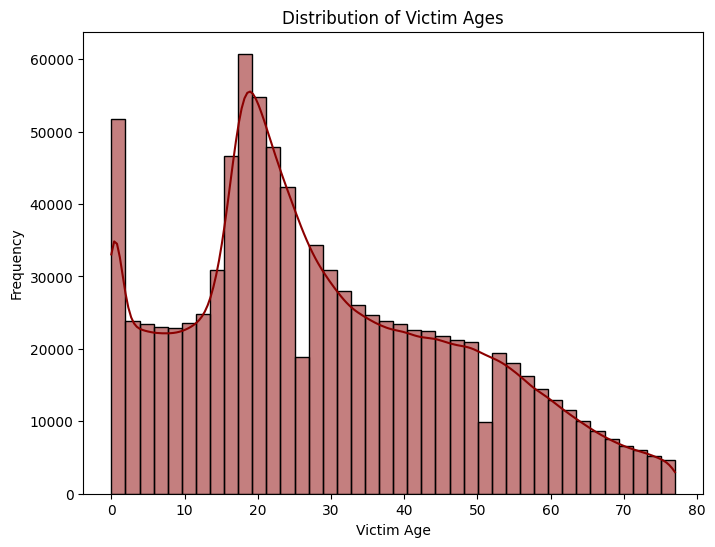

In [ ]:
# Distribution of Victim Ages
Victim_ages_dist = victims_cleaned.groupBy("victim_age").count().orderBy(desc("count"))
Victim_ages_dist.show()
# Convert to Pandas
victims_cleaned_pd = victims_cleaned.toPandas()
# Plot
plt.figure(figsize=(8, 6))
sns.histplot(victims_cleaned_pd["victim_age"], color="darkred", bins=40, kde=True)
plt.xlabel("Victim Age")
plt.ylabel("Frequency")
plt.title("Distribution of Victim Ages")
plt.show()

##**3.1.5. Collision Severity vs Number of Victims.** <font color = red>[5 marks]</font> <br>

Q: Study the relationship between collision severity and the number of victims.

+--------------------------+--------------------+-----------+
|collision_severity_indexed|  collision_severity|avg_victims|
+--------------------------+--------------------+-----------+
|                       3.0|       severe injury|       1.62|
|                       2.0|        other injury|       1.51|
|                       1.0|                pain|       1.37|
|                       0.0|property damage only|        0.0|
+--------------------------+--------------------+-----------+



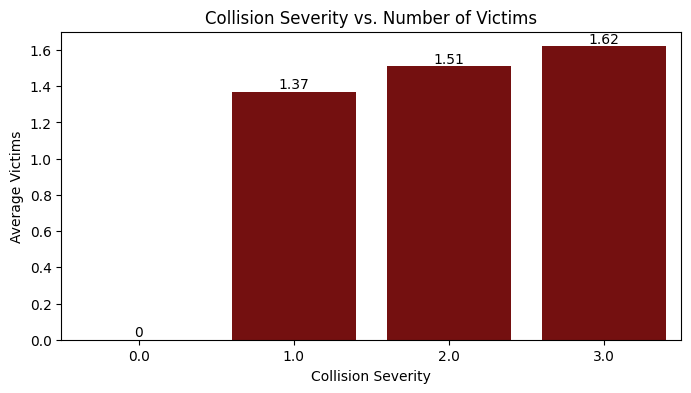

In [ ]:
# Bivariate Analysis

# Collision Severity vs. Number of Victims
severity_vs_victims_df = collisions_cleaned.withColumn("total_victims", col("injured_victims") + col("killed_victims"))

severity_stats = (severity_vs_victims_df.groupBy("collision_severity_indexed", "collision_severity").agg(round(avg("total_victims"), 2).alias("avg_victims")).orderBy(desc("avg_victims")))
severity_stats.show()

# Convert to Pandas
severity_stats_pd = severity_stats.toPandas()

# Plot
plt.figure(figsize=(8, 4))
ax = sns.barplot( data=severity_stats_pd, x="collision_severity_indexed", y="avg_victims", color='#840000')
plt.title("Collision Severity vs. Number of Victims")
plt.xlabel("Collision Severity")
plt.ylabel("Average Victims")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

##**3.1.6. Weather Conditions vs Collision Severity.** <font color = red>[5 marks]</font> <br>

Q: Analyze the correlation between weather conditions and collision severity.

In [ ]:
Weather_vs_Collision_pivoted = collisions_cleaned.groupBy("weather_indexed","weather").pivot("collision_severity").agg(count("case_id"))
Weather_vs_Collision_pivoted.orderBy("weather_indexed").show()

+---------------+-------+------------+------+--------------------+-------------+
|weather_indexed|weather|other injury|  pain|property damage only|severe injury|
+---------------+-------+------------+------+--------------------+-------------+
|            0.0|  clear|       97831|187239|              466187|        18669|
|            1.0| cloudy|       14153| 28856|               76574|         2572|
|            2.0|raining|        3336|  7962|               20422|          621|
|            3.0|Unknown|         560|  1194|                2795|           77|
|            4.0|    fog|         517|   754|                2490|          140|
|            5.0|snowing|         148|   220|                 981|           21|
|            6.0|  other|          82|   178|                 797|           24|
|            7.0|   wind|          54|    89|                 233|           14|
+---------------+-------+------------+------+--------------------+-------------+



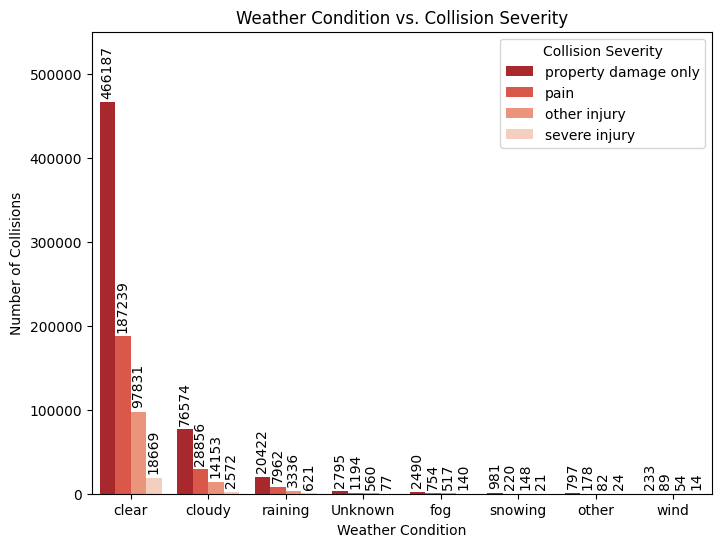

In [ ]:
# Weather vs. Collision Severity
Weather_vs_Collision = collisions_cleaned.groupBy("weather","weather_indexed","collision_severity","collision_severity_indexed").count().orderBy(desc("count"))
# Convert to Pandas
Weather_vs_Collision_pd = Weather_vs_Collision.toPandas()
# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=Weather_vs_Collision_pd, x='weather', y='count', hue='collision_severity', palette='Reds_r')
plt.title("Weather Condition vs. Collision Severity")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Collisions")
plt.legend(title="Collision Severity")
plt.ylim(0,550000)
for container in ax.containers:
    ax.bar_label(container, rotation=90, padding=3)
plt.show()

##**3.1.7. Lighting conditions vs Collision Severity.** <font color = red>[5 marks]</font> <br>

Q:Visualize the impact of lighting conditions on collision severity.

In [ ]:
Lighting_vs_Collision_pivoted = collisions_cleaned.groupBy("lighting_indexed","lighting").pivot("collision_severity").agg(count("case_id"))
Lighting_vs_Collision_pivoted.orderBy("lighting_indexed").show()

+----------------+--------------------+------------+------+--------------------+-------------+
|lighting_indexed|            lighting|other injury|  pain|property damage only|severe injury|
+----------------+--------------------+------------+------+--------------------+-------------+
|             0.0|            daylight|       77318|162027|              374190|        12039|
|             1.0|dark with street ...|       23715| 42870|              123459|         5823|
|             2.0|dark with no stre...|       10693| 12088|               48607|         3245|
|             3.0|        dusk or dawn|        4149|  7884|               19718|          896|
|             4.0|             Unknown|         580|  1237|                3410|           74|
|             5.0|dark with street ...|         226|   386|                1095|           61|
+----------------+--------------------+------------+------+--------------------+-------------+



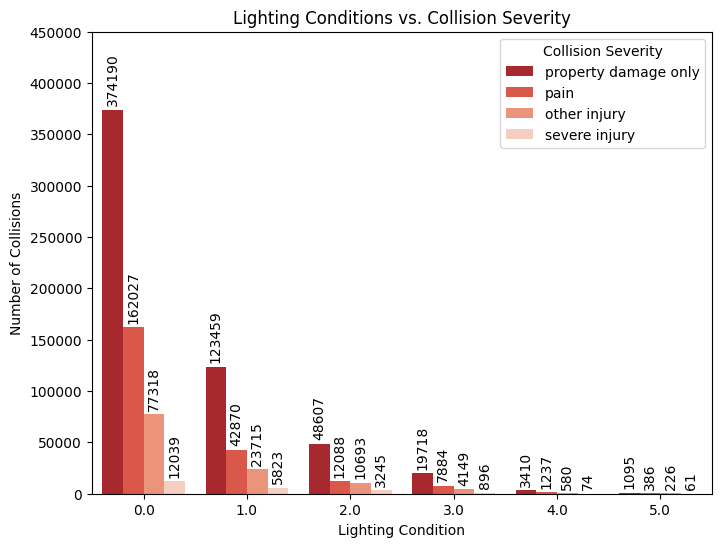

In [ ]:
# Lighting Conditions vs. Collision Severity
lighting_vs_collision_severity = collisions_cleaned.groupBy("lighting_indexed", "lighting", "collision_severity_indexed", "collision_severity").count().orderBy(desc("count"))
# Convert to Pandas
lighting_vs_collision_severity_pd = lighting_vs_collision_severity.toPandas()
# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=lighting_vs_collision_severity_pd, x='lighting_indexed', y='count', hue='collision_severity', palette='Reds_r')
plt.title("Lighting Conditions vs. Collision Severity")
plt.xlabel("Lighting Condition")
plt.ylabel("Number of Collisions")
plt.ylim(0,450000)
plt.legend(title="Collision Severity")
for container in ax.containers:
    ax.bar_label(container, rotation=90, padding=3)
plt.show()

##**3.1.8. Weekday-Wise Collision Trends.** <font color = red>[7 marks]</font> <br>

Q: Extract and analyze weekday-wise collision trends.

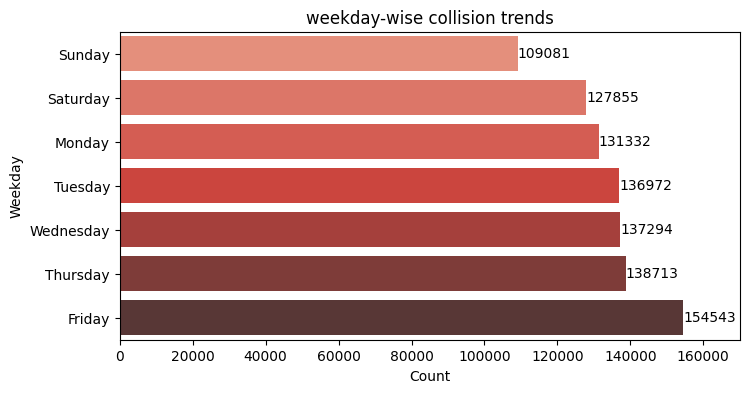

In [ ]:
# Extract the weekday
weekday_df = collisions_cleaned.withColumn("weekday",date_format("collision_date","EEEE")).groupBy("weekday").count().orderBy("count")
weekday_df_pd = weekday_df.toPandas()
# Plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=weekday_df_pd,x='count',y='weekday',hue="weekday",palette="Reds_d")
plt.title("weekday-wise collision trends")
plt.xlabel("Count")
plt.ylabel("Weekday")
plt.xlim(0, 170000)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

##**3.1.9. Spatial Distribution of Collisions.** <font color = red>[7 marks]</font> <br>

Q: Study spatial distribution of collisions by county.

In [ ]:
county_collision_counts = collisions_cleaned.groupBy("county_location").count().orderBy(col("count").desc())
county_collision_counts.show()
# Collision Density by County
county_collision_counts_pd = county_collision_counts.toPandas()

+---------------+------+
|county_location| count|
+---------------+------+
|    los angeles|284100|
|         orange| 72042|
| san bernardino| 56737|
|      san diego| 53104|
|      riverside| 48686|
|        alameda| 46525|
|     sacramento| 40503|
|    santa clara| 34116|
|   contra costa| 21460|
|    san joaquin| 20621|
|        ventura| 20260|
|           kern| 19348|
|         fresno| 17438|
|      san mateo| 16703|
|     stanislaus| 14295|
|  san francisco| 13250|
|       monterey| 12244|
|         sonoma| 12074|
|  santa barbara| 11929|
|         tulare| 11713|
+---------------+------+
only showing top 20 rows


In [ ]:
import geopandas as gpd

In [ ]:
california_counties = gpd.read_file("https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/california-counties.geojson")

print(california_counties.columns)

Index(['name', 'cartodb_id', 'created_at', 'updated_at', 'geometry'], dtype='object')


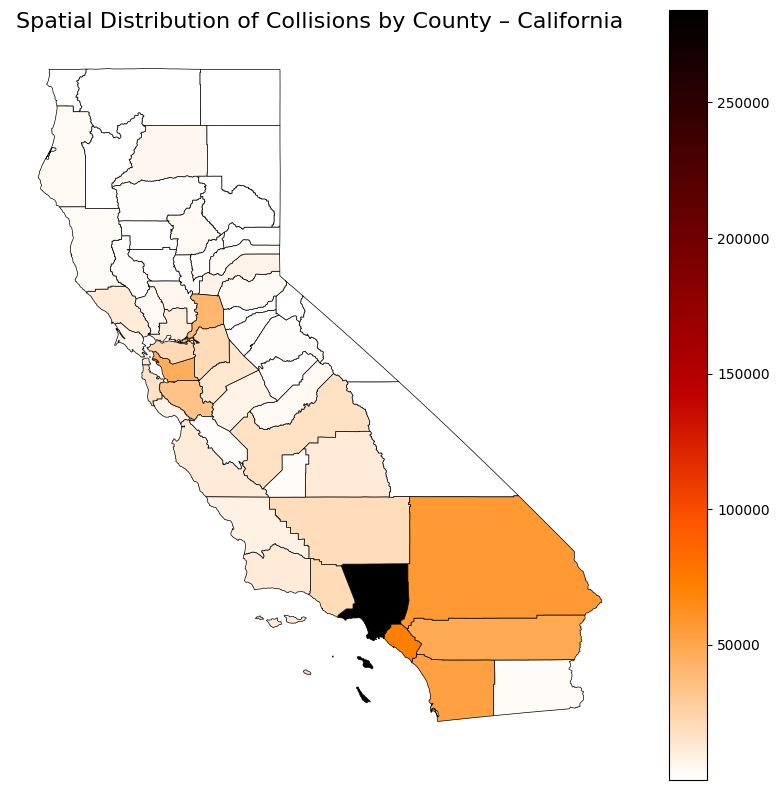

In [ ]:
# Spatial Analysis
county_collision_counts_pd["county_location"] = (county_collision_counts_pd["county_location"].str.upper())
california_counties["name"] = california_counties["name"].str.upper()

# merging
merge = california_counties.merge(
    county_collision_counts_pd,
    left_on="name",
    right_on="county_location",
    how="left")

# missing values
merge["count"] = merge["count"].fillna(0)

# plot
merge.plot(column="count",cmap="gist_heat_r",figsize=(10, 10),legend=True,edgecolor="black",linewidth=0.5)
plt.title("Spatial Distribution of Collisions by County – California", fontsize=16)
plt.axis("off")
plt.show()

## **3.1.10. Collision Analysis by Geography.** <font color = red>[6 marks]</font> <br>

Q: Generate a scatter plot to analyze collision locations geographically.

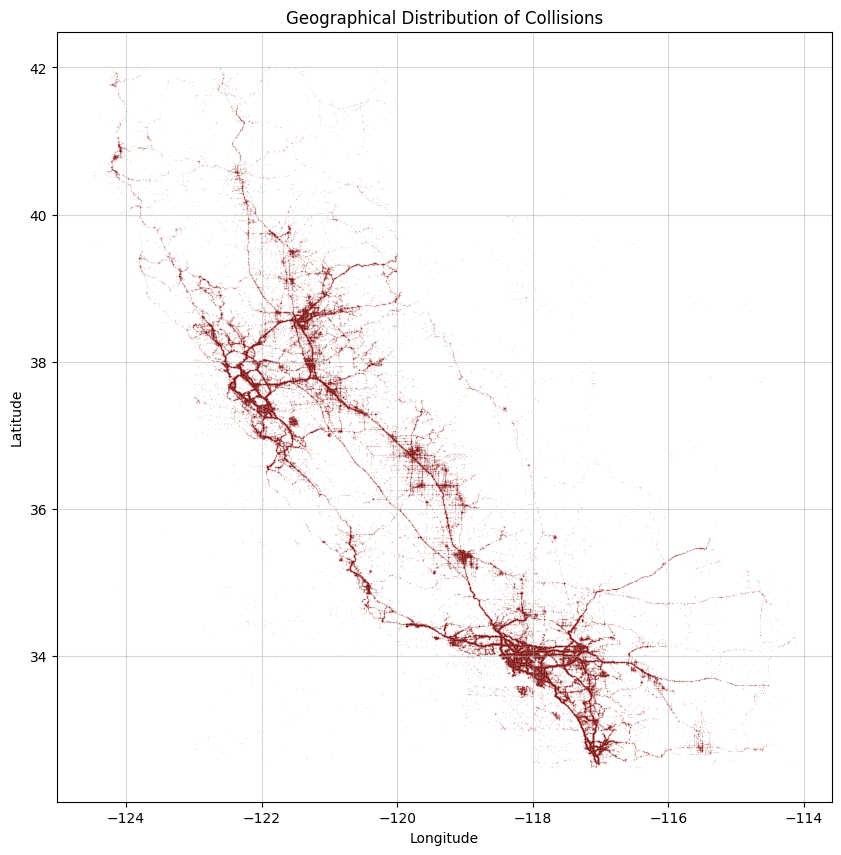

In [ ]:
# Scatter Plot of Collision Locations

# handling potential missing values that were replaced with 0
collision_locations = collisions_cleaned.filter((col("latitude")!=0) & (col("longitude")!=0))
collision_locations_pd = collision_locations.select("latitude", "longitude").toPandas()

# Plot the scatter plot
plt.figure(figsize=(10, 10))
sns.scatterplot(data=collision_locations_pd, x='longitude', y='latitude', c='darkred', s=1, alpha=0.1)
plt.title('Geographical Distribution of Collisions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, alpha=0.5)
plt.show()

##**3.1.11. Collision Trends Over Time.** <font color = red>[10 marks]</font> <br>

Extract and analyzing collision trends over time.

In [ ]:
# Extract year, month, and hour from collision_date and collision_time
collisions_cleaned = collisions_cleaned \
    .withColumn("collision_year", year(col("collision_date"))) \
    .withColumn("collision_month", month(col("collision_date"))) \
    .withColumn("collision_hour", hour(try_to_timestamp(col("collision_time"), lit("HH:mm:ss"))))

# Show sample of the new DataFrame
collisions_cleaned.select("collision_date", "collision_time", "collision_year", "collision_month", "collision_hour").limit(5).show()

+--------------+-------------------+--------------+---------------+--------------+
|collision_date|     collision_time|collision_year|collision_month|collision_hour|
+--------------+-------------------+--------------+---------------+--------------+
|    2021-01-17|2026-01-14 11:55:00|          2021|              1|            11|
|    2002-11-07|2026-01-14 18:30:00|          2002|             11|            18|
|    2017-08-23|2026-01-14 13:35:00|          2017|              8|            13|
|    2002-12-28|2026-01-14 19:40:00|          2002|             12|            19|
|    2008-05-21|2026-01-14 07:40:00|          2008|              5|             7|
+--------------+-------------------+--------------+---------------+--------------+



Q: Analyze yearly, monthly and hourly trends in collisions.

+--------------+-----+
|collision_year|count|
+--------------+-----+
|          2001|51920|
|          2002|53708|
|          2003|53605|
|          2004|53704|
|          2005|53074|
|          2006|49642|
|          2007|49560|
|          2008|44882|
|          2009|42421|
|          2010|41320|
|          2011|40092|
|          2012|39689|
|          2013|38234|
|          2014|39702|
|          2015|43367|
|          2016|49167|
|          2017|48408|
|          2018|47951|
|          2019|46126|
|          2020|36020|
+--------------+-----+
only showing top 20 rows


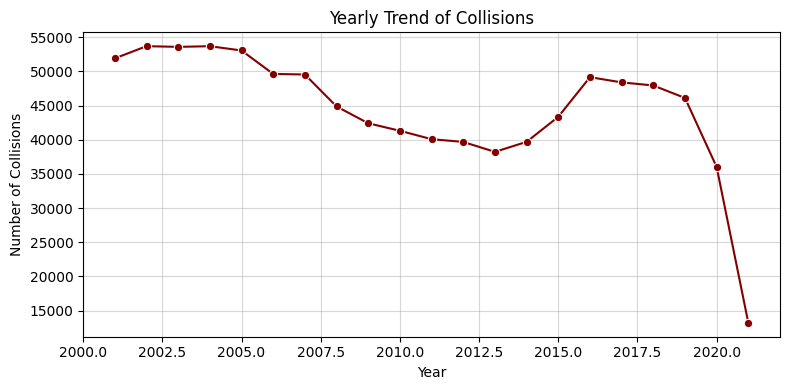

In [ ]:
# Yearly Trend of Collisions
yearly_collisions = collisions_cleaned.groupBy("collision_year").count().orderBy("collision_year")
yearly_collisions.show()

# Convert to Pandas for plotting
yearly_collisions_pd = yearly_collisions.toPandas()

# Plot
plt.figure(figsize=(8, 4))
sns.lineplot(data=yearly_collisions_pd, x='collision_year', y='count', marker='o', color='#840000')
plt.title("Yearly Trend of Collisions")
plt.xlabel("Year")
plt.ylabel("Number of Collisions")
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

+---------------+-----+
|collision_month|count|
+---------------+-----+
|              1|78323|
|              2|75780|
|              3|82167|
|              4|76208|
|              5|78961|
|              6|74762|
|              7|74776|
|              8|76960|
|              9|77019|
|             10|83274|
|             11|78061|
|             12|79499|
+---------------+-----+



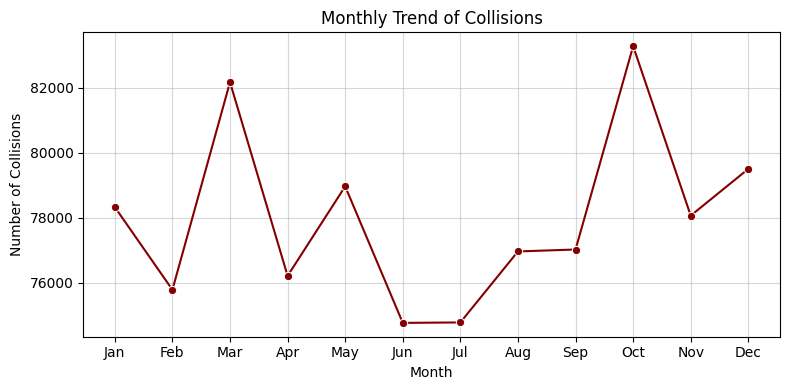

In [ ]:
# Monthly Trend of Collisions
monthly_collisions = collisions_cleaned.groupBy("collision_month").count().orderBy("collision_month")
monthly_collisions.show()

# Convert to Pandas for plotting
monthly_collisions_pd = monthly_collisions.toPandas()

# Plot
plt.figure(figsize=(8, 4))
sns.lineplot(data=monthly_collisions_pd, x='collision_month', y='count', marker='o', color='#840000')
plt.title("Monthly Trend of Collisions")
plt.xlabel("Month")
plt.ylabel("Number of Collisions")
plt.grid(True, alpha=0.5)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

+--------------+-----+
|collision_hour|count|
+--------------+-----+
|             0|26444|
|             1|17567|
|             2|17599|
|             3|11943|
|             4|10650|
|             5|15281|
|             6|25149|
|             7|47496|
|             8|48939|
|             9|38586|
|            10|39045|
|            11|44731|
|            12|51959|
|            13|53230|
|            14|60158|
|            15|70857|
|            16|67432|
|            17|73255|
|            18|58855|
|            19|41723|
+--------------+-----+
only showing top 20 rows


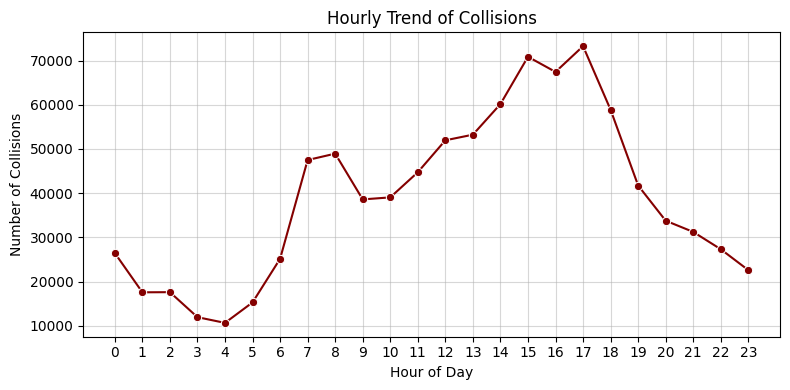

In [ ]:
# Hourly Trend of Collisions
hourly_collisions = collisions_cleaned.groupBy("collision_hour").count().orderBy("collision_hour")
hourly_collisions.show()

# Convert to Pandas for plotting
hourly_collisions_pd = hourly_collisions.toPandas()

# Plot
plt.figure(figsize=(8, 4))
sns.lineplot(data=hourly_collisions_pd, x='collision_hour', y='count', marker='o', color='#840000')
plt.title("Hourly Trend of Collisions")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Collisions")
plt.grid(True, alpha=0.5)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

#**4. ETL Querying** <font color = red>[35 marks]</font> <br>

##**4.1 Loading the Dataset** <font color = red>[1 marks]</font> <br>

Q: Load the processed dataset as CSV files in S3 bucket.

In [ ]:
# Write your query here

## **4.2. Top 5 Counties** <font color = red>[4 marks]</font> <br>

Q: Identify the top 5 counties with the highest number of collisions.

In [ ]:
# Query: Identify the top 5 counties with the most collisions
collisions_cleaned.groupBy("county_location").agg(count("*").alias("Collision_count")).orderBy(col("Collision_count").desc()).limit(5).show()

+---------------+---------------+
|county_location|Collision_count|
+---------------+---------------+
|    los angeles|         284100|
|         orange|          72042|
| san bernardino|          56737|
|      san diego|          53104|
|      riverside|          48686|
+---------------+---------------+



##**4.3. Month with Highest Collisions** <font color = red>[5 marks]</font> <br>

Q. Identify the month with the highest number of collisions.

In [ ]:
# Query: Find the month with the highest number of collisions
collisions_cleaned.groupBy("collision_month").agg(count("*").alias("Collision_count")).orderBy(col("Collision_count").desc()).limit(1).show()

+---------------+---------------+
|collision_month|Collision_count|
+---------------+---------------+
|             10|          83274|
+---------------+---------------+



##**4.4. Weather Conditions with Highest Collisions.** <font color = red>[5 marks]</font> <br>

Q. Determine the most common weather condition during collisions.

In [ ]:
# Query: Find the most common weather condition during collisions
collisions_cleaned.groupBy("weather","weather_indexed").agg(count("*").alias("Collision_count")).orderBy(col("Collision_count").desc()).limit(1).show()

+-------+---------------+---------------+
|weather|weather_indexed|Collision_count|
+-------+---------------+---------------+
|  clear|            0.0|         769926|
+-------+---------------+---------------+



##**4.5. Fatal Collisions.** <font color = red>[5 marks]</font> <br>

Q. Calculate the percentage of collisions that resulted in fatalities.

In [ ]:
# Query: Determine the percentage of collisions that resulted in fatalities
collisions_cleaned.agg(mean(col("killed_victims") * 100).alias("percentage_fatalities")).show()

+---------------------+
|percentage_fatalities|
+---------------------+
|                  0.0|
+---------------------+



##**4.6. Dangerous Time for Collisions.** <font color = red>[5 marks]</font> <br>

Q. Find the most dangerous time of day for collisions.

In [ ]:
# Query: Find the most dangerous time of day for collisions
collisions_cleaned.groupBy("collision_hour").agg(count("*").alias("Collision_count")).orderBy(col("Collision_count").desc()).limit(1).show()

+--------------+---------------+
|collision_hour|Collision_count|
+--------------+---------------+
|            17|          73255|
+--------------+---------------+



##**4.7. Road Surface Conditions.** <font color = red>[5 marks]</font> <br>

Q. Identify the top 5 road surface conditions with the highest collision frequency.

In [ ]:
# Query: List the top 5 road types with the highest collision frequency
collisions_cleaned.groupBy("road_surface","road_surface_indexed").agg(count("*").alias("Collision_count")).orderBy(col("Collision_count").desc()).limit(5).show()

+------------+--------------------+---------------+
|road_surface|road_surface_indexed|Collision_count|
+------------+--------------------+---------------+
|         dry|                 0.0|         845636|
|         wet|                 1.0|          76833|
|     Unknown|                 2.0|           8141|
|       snowy|                 3.0|           4122|
|    slippery|                 4.0|           1048|
+------------+--------------------+---------------+



##**4.8. Lighting Conditions.** <font color = red>[5 marks]</font> <br>

Q. Analyze lighting conditions that contribute to the highest number of collisions.

In [ ]:
# Query: Find the top 3 lighting conditions that lead to the most collisions
collisions_cleaned.groupBy("lighting","lighting_indexed").agg(count("*").alias("Collision_count")).orderBy(col("Collision_count").desc()).limit(3).show()

+--------------------+----------------+---------------+
|            lighting|lighting_indexed|Collision_count|
+--------------------+----------------+---------------+
|            daylight|             0.0|         625574|
|dark with street ...|             1.0|         195867|
|dark with no stre...|             2.0|          74633|
+--------------------+----------------+---------------+



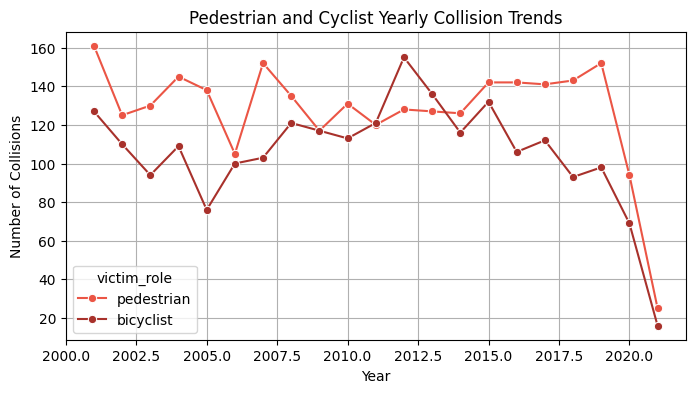

In [ ]:
# pedestrian and cyclist (Vulnerable Road Users "vru") collision trends.
df = collisions_cleaned.join(victims_cleaned,on="case_id",how="inner")
vru_df = df.filter(col("victim_role").isin("pedestrian", "bicyclist"))

vru_collision = vru_df.groupBy("victim_role", "collision_year").agg(count("*").alias("count")).orderBy("collision_year")
vru_collision_pd = vru_collision.toPandas()

plt.figure(figsize=(8, 4))
sns.lineplot(data=vru_collision_pd,x="collision_year",y="count",hue="victim_role", palette = "Reds_d",marker="o")
plt.title("Pedestrian and Cyclist Yearly Collision Trends")
plt.xlabel("Year")
plt.ylabel("Number of Collisions")
plt.grid(True)
plt.show()

+--------------------+-----+
|  collision_severity|count|
+--------------------+-----+
|                pain|41692|
|property damage only|26528|
|        other injury|21452|
|       severe injury| 4110|
+--------------------+-----+



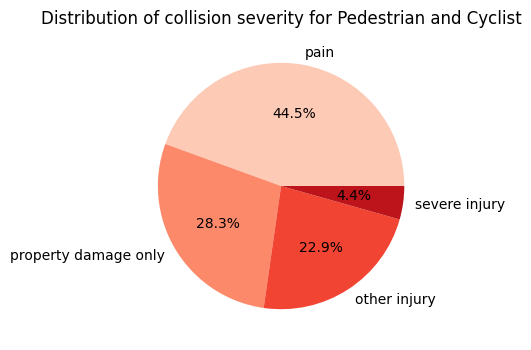

In [ ]:
df = collisions_cleaned.join(victims_cleaned,on="case_id",how="inner")

vru_collision_severity = df.groupBy("collision_severity").agg(count("*").alias("count")).orderBy(desc("count"))
vru_collision_severity.show()
vru_collision_severity_pd = vru_collision_severity.toPandas()

plt.figure(figsize=(4, 4))
plt.pie(x=vru_collision_severity_pd['count'], labels=vru_collision_severity_pd['collision_severity'], autopct="%.1f%%", colors=sns.color_palette('Reds', n_colors=len(vru_collision_severity_pd)))
plt.title("Distribution of collision severity for Pedestrian and Cyclist")
plt.show()

#5. Conclusion <font color = red>[10 marks]</font> <br>

Write your conclusion.

In [ ]:
# Final insights and recommendations

Final insights:

1.   Los Angeles, Orange, San Bernardino, San Diego, and Riverside counties consistently exhibit the highest collision frequencies.
2.  The peak collision times are concentrated between 3 PM and 6 PM on weekdays, with Fridays showing the highest daily collision counts.
3.  October, March, and December are months with slightly increased collision frequencies.
4.  Pedestrian and bicyclist collisions showed an increasing trend from 2012-2013, peaking around 2018-2019.
5.   While most collisions occur under clear weather (769,926 incidents), daylight, and dry road conditions (845,636 incidents), adverse conditions like rain (32,341 incidents) and wet road surfaces (76,833 incidents) significantly elevate the risk of injury-related collisions.
6.   Collision severity is influenced by lighting conditions; "dark with street lights" and "dark with no street lights" contribute to a substantial number of injuries, including 5,823 and 3,245 severe injuries, respectively.

Recommendations:

1. Targeted Infrastructure & Enforcement: Implement targeted infrastructure improvements (e.g., enhanced lighting, road design modifications, dedicated bike lanes) and increase law enforcement presence in identified high-risk urban areas and major freeways. These efforts should be particularly focused during peak afternoon rush hours on Fridays and in the high-risk months of October, March, and December.
2. Dynamic Traffic Management: Optimize traffic management by analyzing trends in collision severity, weather conditions, and lighting. This includes making data-driven adjustments to traffic signal timings, improving road design, and implementing intelligent transportation systems for real-time congestion warnings, especially during adverse weather conditions and dark hours.
3. Enhanced Pedestrian and Cyclist Safety: Propose data-driven policy changes such as targeted safety campaigns for vulnerable road users (focused on peak years like 2012-2019), increased enforcement against distracted driving, and comprehensive driver education programs emphasizing VRU safety.
4. Proactive Intervention in High-Risk Zones: Utilize geographical collision density and historical accident data to identify specific hotspots for proactive intervention. This involves deploying additional police patrols, launching public safety campaigns, and conducting detailed traffic engineering studies at frequently occurring collision sites to identify and fix infrastructure deficiencies.
5. Predictive Modeling: Develop predictive models to anticipate collision hotspots and support proactive safety measures. These models can utilize temporal, spatial, and environmental data to forecast collision risks in real-time, enabling authorities to allocate resources more efficiently and intervene before incidents occur.

#6. Visualization Integration using Tableau/ PowerBI <font color = red>[Optional]</font> <br>

https://public.tableau.com/shared/3W8SQZBH6?:display_count=n&:origin=viz_share_link